In [0]:
from google.colab import files

uploaded = files.upload()

Saving BX-Book-Ratings.csv to BX-Book-Ratings.csv
Saving BX-Books.csv to BX-Books.csv
Saving BX-Users.csv to BX-Users.csv


In [0]:
## All Libraries used. 

# NOTE! --> Add all Libraries here so we know whats happeneing, Also comment next to it regarding what it does. 

import random 
import numpy as np   
import pandas as pd    # Used for Dataframes. 
from scipy.spatial import distance_matrix
import scipy
import tensorflow as tf
import numpy.random as rng
from sklearn.decomposition import PCA


In [0]:
def train_test_split(ratings_df,percentage):
  m,n = ratings_df.shape
  V = round(m*(100-percentage)/100)
  train = ratings_df.copy()


  a = random.sample(range(ratings_df.shape[0]),int(V))

  train['Ratings'].iloc[a] = np.nan
  
  
  test = train.copy()

  test = test.fillna(1000)
  
  test.ix[test['Ratings'] < 15, 'Ratings'] = np.nan

  test.ix[test['Ratings'] == 1000, 'Ratings'] = 0
  
  test['Ratings'] = test['Ratings'] + ratings_df['Ratings']
  
  return train,test

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 20 17:52:49 2018

@author: prash
"""

# -*- coding: utf-8 -*-
"""
Created on Fri Apr 20 12:29:19 2018

@author: prash
"""


# coding: utf-8

# # Libraries Used

# In[25]:



# # Reading the Dataset


# In[3]:


## Reading the CSV File.

# Reading this CSV is done a liitle differently as there is ";" instead ","(Comma).
# Postprocessing to make the proper Dataframe is in the next Cell. 

df = pd.read_csv('BX-Book-Ratings.csv',sep='delimiter') # Reading the CSV File


# In[4]:


## Preprocessing to form the proper Dataset.

series = df['"User-ID";"ISBN";"Book-Rating"'].astype(str)  # Converting into Series to perform the operations

df = pd.DataFrame(series.str.split(';',expand=True)) # Splitting the Series(strings) with a delimeter (';')

df.columns = ['User-ID', 'ISBN', 'Ratings'] # Changing the Column Name


# In[5]:


## Removing the  '""' from each column and converting them into intergers. 

df['User-ID'] = df['User-ID'].map(lambda x: x.lstrip('"').rstrip('"'))
df['ISBN'] = df['ISBN'].map(lambda x: x.lstrip('"').rstrip('"'))
df['Ratings'] = df['Ratings'].map(lambda x: x.lstrip('"').rstrip('"'))

df['User-ID'] = df['User-ID'].astype(int)
df['Ratings'] = df['Ratings'].astype(int)
df['ISBN'] = df['ISBN'].astype(str)

ratings_df=df

# In[9]:




# # NOTE: NEXT STEP IS ONLY FOR LOCAL COMPS NOT AWS!!
# 
# # Otherwise we run the entire matrix!

# # Filtering Important Data using Pandas

# In[14]:


## Filtering out impotant books to make the dataset smaller

# users with less than 200 ratings and books with less than 100 ratings are excluded

c = ratings_df['User-ID'].value_counts()

ratings_df = ratings_df[ratings_df['User-ID'].isin(c[c >= 200].index)]

c = ratings_df['Ratings'].value_counts()

ratings_df = ratings_df[ratings_df['Ratings'].isin(c[c >= 100].index)]

#ratings_df.head()
percentage=75
print ("Data Pre processing complete"+"\n Now splitting the data into 25% test and 75% train")
train_ratings,test_ratings=train_test_split(ratings_df,percentage)

train_ratings_mat_df = train_ratings.pivot(index ='User-ID', columns ='ISBN', values ='Ratings')

test_ratings_mat_df = test_ratings.pivot(index ='User-ID', columns ='ISBN', values ='Ratings')

## Creating the Desired Matrix

ratings_mat_df = ratings_df.pivot(index ='User-ID', columns ='ISBN', values ='Ratings')


num_users = ratings_df['User-ID'].unique().shape[0]
num_books = ratings_df['ISBN'].unique().shape[0]
print(str(num_users) + ' users')
print(str(num_books) + ' books')

# At this point the ratings range from 1 to 11 where 11 represents a 0 rating
# # Number of Users & Books

# In[15]:



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Data Pre processing complete
 Now splitting the data into 25% test and 75% train


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


905 users
207699 books


In [0]:
# At this point the ratings range from 1 to 11 where 11 represents a 0 rating


#Now Converting this dataframe into an array without doing anythin to the nans
ratings=np.asarray(ratings_mat_df)
ratings[ratings==0]=11 #converting all 0s to 11
ratings[np.isnan(ratings)]=0 # Convert nans to zeros 

train_ratings=np.asarray(train_ratings_mat_df)
train_ratings[train_ratings==0]=11 #converting all 0s to 11
train_ratings[np.isnan(train_ratings)]=0 # Convert nans to zeros 

test_ratings=np.asarray(test_ratings_mat_df)
test_ratings[test_ratings==0]=11 #converting all 0s to 11
test_ratings[np.isnan(test_ratings)]=0 # Convert nans to zeros 


In [0]:
print("Reducing dimensions of the feature matirix to 50")
dimensions=50
pca_train=PCA(n_components=dimensions)
pca_train.fit(train_ratings)
train_pca=pca_train.transform(train_ratings)


pca_total=PCA(n_components=dimensions)
pca_total.fit(ratings)
total_pca=pca_total.transform(ratings)

pca_test=PCA(n_components=dimensions)
pca_test.fit(test_ratings)
test_pca=pca_test.transform(test_ratings)


Reducing dimensions of the feature matirix to 50


In [0]:
test_pca.shape

(905, 50)

In [0]:

# In[]: Neural Network
# Model P in the NN
def relu_deriv(X):
    m=tf.Variable(tf.zeros(X.shape,dtype=tf.float64))
    X=tf.nn.relu(X)
    comparison_pos = tf.greater(X, tf.constant( 1.0 ,dtype=tf.float64))
    m =m.assign( tf.where (comparison_pos, tf.ones_like(X), X) )
    return m

batch=50 #5 works (without PPCA)
#Training parameters 
iterations=1000
eta=tf.constant(0.000001,dtype=tf.float64) #0.00001 works but any larger value of eta makes the cost unstable for a batch size of 5 and hidden units =5


testshape=test_pca.shape
units = 200 #5 works

#Training Data Inputs
x=tf.placeholder(tf.float64,[batch,train_pca.shape[1]],name='x_P')

y=tf.placeholder(tf.float64,testshape,name='y_test')

#Back Prop
w_1=tf.Variable(rng.randn(units,train_pca.shape[1]))
w_2=tf.Variable(rng.randn(units,train_pca.shape[1]))
#b_1=tf.Variable(rng.randn(train_pca.shape[1]))
#b_2=tf.Variable(rng.randn(1,batch))


hidoutbp=tf.nn.relu(tf.matmul(x,tf.transpose(w_1)))
h_primebp=relu_deriv(hidoutbp)
y_predbp=tf.nn.relu(tf.matmul(hidoutbp,(w_2)))

ebp=y_predbp-x
costbp=tf.sqrt(tf.reduce_sum(tf.pow(ebp,2))/(batch))

We=tf.matmul(ebp,tf.transpose(w_2))

# Gradients for a squared loss 

dLw2=tf.matmul(tf.transpose(hidoutbp),ebp)
#dLb2=tf.reduce_sum(ebp)

dLw1 = (tf.matmul(tf.transpose(tf.multiply(We, h_primebp)),x))
#dLb1=tf.reduce_sum(tf.multiply(We, h_primebp),0)
                 


#Feedback alignment
w_1fa=tf.Variable(w_1.initialized_value())


w_2fa=tf.Variable(w_2.initialized_value())


hidoutfa=tf.nn.relu(tf.matmul(x,tf.transpose(w_1fa)))
h_primefa=relu_deriv(hidoutfa)
y_predfa=tf.nn.relu(tf.matmul(hidoutfa,(w_2fa)))

B=tf.Variable(rng.randn(units,train_pca.shape[1]))
efa=y_predfa-x

costfa=tf.sqrt(tf.reduce_sum(tf.pow(efa,2))/(batch))

Be=tf.matmul(ebp,tf.transpose(B))
               
# Gradients for a squared loss
dLw1fa = (tf.matmul(tf.transpose(tf.multiply(Be, h_primefa)),x))

dLw2fa=tf.matmul(tf.transpose(hidoutfa),efa)

               
               
# Testing on trained models per epoch

hidoutbp_test=tf.nn.relu(tf.matmul(y,tf.transpose(w_1)))
y_predtestbp=tf.nn.relu(tf.matmul(hidoutbp_test,(w_2)))  #Back prop testing
ebp_test=y_predtestbp-y

hidoutfa_test=tf.nn.relu(tf.matmul(y,tf.transpose(w_1fa)))
y_predtestfa=tf.nn.relu(tf.matmul(hidoutfa_test,(w_2fa))) #Feedback Alignment
efa_test=y_predtestfa-y 


costbp_test=tf.sqrt(tf.reduce_sum(tf.pow(ebp_test,2))/(batch))

costfa_test=tf.sqrt(tf.reduce_sum(tf.pow(efa_test,2))/(batch))



In [0]:
               
def updatebp(w_1,w_2):
    new_w1=w_1.assign(w_1-tf.multiply(eta,dLw1))
    new_w2=w_2.assign(w_2-tf.multiply(eta,dLw2))
    return new_w1,new_w2

def updatefa(w_1fa,w_2fa):
    new_w1fa=w_1fa.assign(w_1fa-tf.multiply(eta,dLw1fa))
    new_w2fa=w_2fa.assign(w_2fa-tf.multiply(eta,dLw2fa))
    return new_w1fa,new_w2fa


In [0]:
init = tf.global_variables_initializer()
bplist_train=[]
falist_train=[]

bplist_test=[]
falist_test=[]

print ("Starting")
with tf.Session() as sess:
    #data=ratings[np.random.randint(ratings.shape[0],size=batch),:]
    #data=data/11
    sess.run(init)
    print("Commencing Training")
    for idx in range(iterations):
      data_train=train_pca[np.random.randint(train_pca.shape[0],size=batch),:]
      sess.run(updatebp(w_1,w_2),feed_dict={x:data_train/11})
      cbp = sess.run(costbp, feed_dict={x: data_train/11})
      bplist_train.append(np.sqrt(cbp))
      cbp_test=sess.run(costbp_test,feed_dict={y:test_pca})
      bplist_test.append(cbp_test)

      sess.run(updatefa(w_1fa,w_2fa),feed_dict={x:data_train})
      
      cfa = sess.run(costfa, feed_dict={x: data_train})
      
      falist_train.append(np.sqrt(cfa))        
      
      cfa_test=sess.run(costfa_test,feed_dict={y:test_pca})
      falist_test.append(cfa_test)

      if idx % 50==0:
        print("Training cost:\niteration: %d Backprop:%f \t Feedback alignment:%f" %(idx,cbp,cfa))
        print("Testing cost:\niteration: %d Backprop:%f \t Feedback alignment:%f" %(idx,cbp_test,cfa_test))

Starting
Commencing Training
Training cost:
iteration: 0 Backprop:286.451235 	 Feedback alignment:3122.980788
Testing cost:
iteration: 0 Backprop:13259.569199 	 Feedback alignment:2341.626595
Training cost:
iteration: 50 Backprop:46.349486 	 Feedback alignment:395.690774
Testing cost:
iteration: 50 Backprop:3242.282143 	 Feedback alignment:24888.322924
Training cost:
iteration: 100 Backprop:38.729474 	 Feedback alignment:17894.875524
Testing cost:
iteration: 100 Backprop:2606.658474 	 Feedback alignment:118551.876639
Training cost:
iteration: 150 Backprop:41.967952 	 Feedback alignment:155.201884
Testing cost:
iteration: 150 Backprop:2414.517534 	 Feedback alignment:51150.805915
Training cost:
iteration: 200 Backprop:20.577400 	 Feedback alignment:122.640460
Testing cost:
iteration: 200 Backprop:2289.304522 	 Feedback alignment:125917.660252
Training cost:
iteration: 250 Backprop:23.300625 	 Feedback alignment:164.536140
Testing cost:
iteration: 250 Backprop:2204.679966 	 Feedback alig

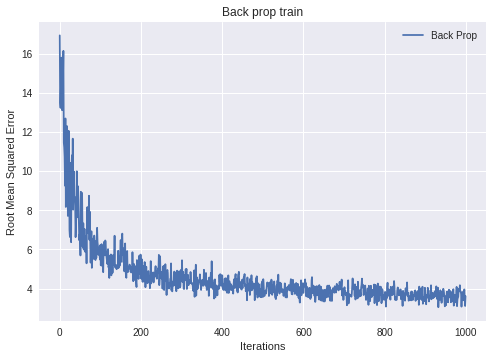

In [0]:
import matplotlib.pyplot as plt
#newList = [x / 15 for x in costbp]
plt.plot(bplist_train,label="Back Prop")

plt.xlabel("Iterations")
plt.ylabel("Root Mean Squared Error")
plt.title("Back prop train")
plt.legend()
plt.show()

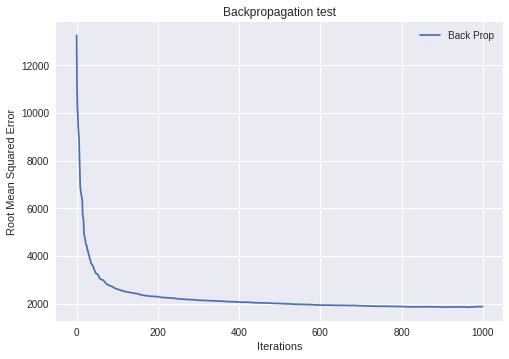

In [0]:
import matplotlib.pyplot as plt
#newList = [x / 15 for x in costbp]
plt.plot(bplist_test,label="Back Prop")
plt.xlabel("Iterations")
plt.ylabel("Root Mean Squared Error")
plt.title("Backpropagation test")
plt.legend()
plt.show()

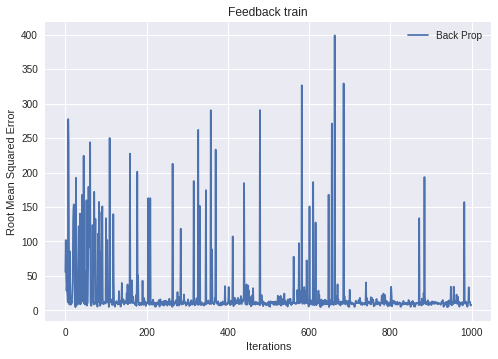

In [0]:
import matplotlib.pyplot as plt
#newList = [x / 15 for x in costbp]
plt.plot(falist_train,label="Back Prop")

plt.xlabel("Iterations")
plt.ylabel("Root Mean Squared Error")
plt.title("Feedback train")
plt.legend()
plt.show()

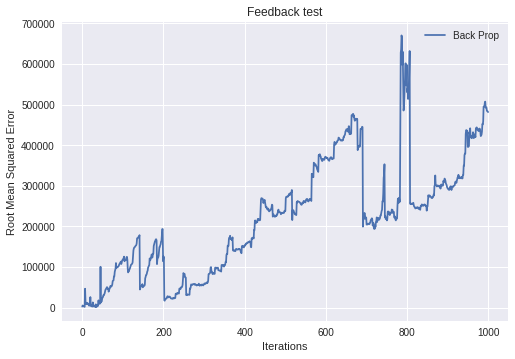

In [0]:
import matplotlib.pyplot as plt
#newList = [x / 15 for x in costbp]
plt.plot(falist_test,label="Back Prop")

plt.xlabel("Iterations")
plt.ylabel("Root Mean Squared Error")
plt.title("Feedback test")
plt.legend()
plt.show()